# Toronto Raptors Performance Versus Major Rival

## Objective

<p>In this project, I visualize the performance of the Toronto Raptors against their top rival, the Cleveland Cavaliers, according to the <a href=https://clutchpoints.com/toronto-raptors-top-5-rivals-of-all-time-ranked> Clutch Points</a>.
I used the <a href=https://pypi.org/project/nba-api/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>NBA API</a> to determine the number of points
the Toronto Raptors won or lost by for each game. So if the value is three, the Golden State Warriors won by three points. Similarly it the  Raptors lost  by two points the result will be negative two. The API will handle a lot of the details, such a Endpoints and Authentication. </p>

In [10]:
!pip install matplotlib

     ---------------------------------------- 0.0/158.4 kB ? eta -:--:--
     --------- --------------------------- 41.0/158.4 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 158.4/158.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   --- ------------------------------------ 0.6/7.6 MB 20.5 MB/s eta 0:00:01
   ------- -------------------------------- 1.5/7.6 MB 19.0 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/7.6 MB 17.9 MB/s eta 0:00:01
   ---------------- ----------------------- 3.1/7.6 MB 18.2 MB/s eta 0:00:01
   --------------------- ------------------ 4.0/7.6 MB 18.4 MB/s eta 0:00:01
   ------------------------- -------------- 4.9/7.6 MB 18.4 MB/s eta 0:00:01
   ----------------------------- ---------- 5.7/7.6 MB 18.3 MB/s eta 0:00:01
   ---------------------------------- ----- 6.6/7.6 MB 18.2 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.6 MB 18.4 MB/s eta 0:00:01
   --

In [12]:
!pip install nba_api

   ---------------------------------------- 0.0/261.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/261.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/261.7 kB ? eta -:--:--
   ------ -------------------------------- 41.0/261.7 kB 487.6 kB/s eta 0:00:01
   ---------------------------------------  256.0/261.7 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 261.7/261.7 kB 2.0 MB/s eta 0:00:00


In [13]:
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
from nba_api.stats.static import teams

In [19]:
nba_teams = teams.get_teams()

In [20]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [22]:
df_teams = pd.DataFrame(nba_teams)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [26]:
# Will use the team's nickname to find the unique id, we can see the row that contains the warriors by using the column nickname as follows:
df_raptors = df_teams[df_teams['nickname']=='Raptors']
df_raptors

,id,full_name,abbreviation,nickname,city,state,year_founded
24,1610612761,Toronto Raptors,TOR,Raptors,Toronto,Ontario,1995


In [31]:
# To access the first column of the DataFrame
id_raptors = df_raptors[['id']].values[0][0]

# the ID integer can be used to request the raptors information
id_raptors


1610612761

In [32]:
from nba_api.stats.endpoints import leaguegamefinder

In [34]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_raptors)

In [35]:
gamefinder.get_json()

'{"resource": "leaguegamefinderparameters", "parameters": {"PlayerOrTeam": "T", "LeagueID": null, "Season": null, "SeasonType": null, "TeamID": "1610612761", "VsTeamID": null, "PlayerID": null, "GameID": null, "Outcome": null, "Location": null, "DateFrom": null, "DateTo": null, "VsConference": null, "VsDivision": null, "Conference": null, "Division": null, "DraftYear": null, "DraftNumber": null, "DraftRound": null, "DraftTeamID": null, "RookieYear": null, "YearsExperience": null, "SeasonSegment": null, "PORound": null, "StarterBench": null, "GtPTS": null, "GtREB": null, "GtAST": null, "GtSTL": null, "GtBLK": null, "GtOREB": null, "GtDREB": null, "GtDD": null, "GtTD": null, "GtMINUTES": null, "GtTOV": null, "GtPF": null, "GtFGM": null, "GtFGA": null, "GtFG_PCT": null, "GtFTM": null, "GtFTA": null, "GtFT_PCT": null, "GtFG3M": null, "GtFG3A": null, "GtFG3_PCT": null, "LtPTS": null, "LtREB": null, "LtAST": null, "LtSTL": null, "LtBLK": null, "LtOREB": null, "LtDREB": null, "LtDD": null, "L

In [40]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22023,1610612761,TOR,Toronto Raptors,0022300251,2023-11-26,TOR @ CLE,L,240,102,...,0.690,17,33,50,17,9,3,12,11,-3.0
1,22023,1610612761,TOR,Toronto Raptors,0022300046,2023-11-24,TOR vs. CHI,W,241,121,...,0.741,13,27,40,32,8,6,14,14,13.0
2,22023,1610612761,TOR,Toronto Raptors,0022300230,2023-11-22,TOR @ IND,W,240,132,...,0.833,13,33,46,26,7,3,17,15,1.0
3,22023,1610612761,TOR,Toronto Raptors,0022300038,2023-11-21,TOR @ ORL,L,241,107,...,0.773,5,33,38,29,6,6,23,20,-19.0
4,22023,1610612761,TOR,Toronto Raptors,0022300211,2023-11-19,TOR vs. DET,W,240,142,...,0.621,12,35,47,44,10,5,7,23,29.0


The above table contains information about all the games the Raptors played. The PLUS_MINUS column contains information on the score, if the value is negative, the Raptors lost by that many points, if the value is positive, the Raptors won by that amount of points. The column MATCHUP has the team the Raptors were playing, TOR means Toronto Raptors and CLE. vs signifies it was a home game and the @ symbol means an away game.

We can create two dataframes, one for the games that the Raptors faced the Cavaliers at home, and the second for away games.

In [37]:
games_home=games[games['MATCHUP']=='TOR vs. CLE']
games_away=games[games['MATCHUP']=='TOR @ CLE']


We can calculate the mean for the column PLUS_MINUS for the dataframes games_home and  games_away:

In [39]:
round(games_home['PLUS_MINUS'].mean(), 3)

3.233

In [41]:
round(games_away['PLUS_MINUS'].mean(), 3)

-5.732

We can plot out the PLUS MINUS column for the dataframes games_home and  games_away. We see the Raptors performed poorly in their away games against the Cavaliers and better at home. This could indicate a strong rivalry between the two teams as verified by <a href=https://clutchpoints.com/toronto-raptors-top-5-rivals-of-all-time-ranked> Clutch Points</a>

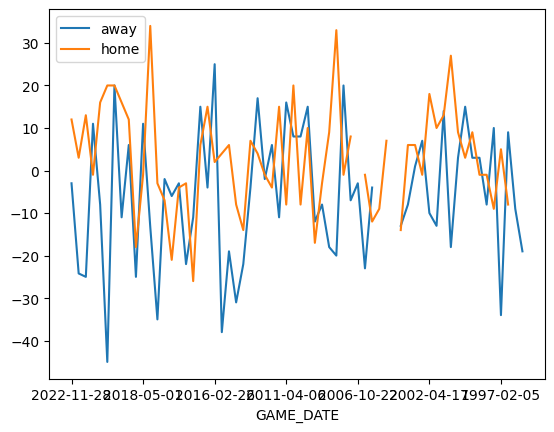

In [42]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

The average points for the Raptors home and away games in the NBA is similar.

In [44]:
print(round(games_home['PTS'].mean(),2))

print(round(games_away['PTS'].mean(),2))

98.8
98.05
